In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [13]:
df.shape

(22, 4)

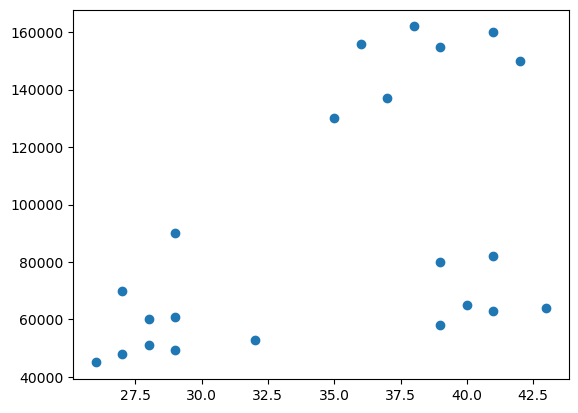

In [5]:
plt.scatter(df["Age"],df["Income($)"])
plt.show()

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init="auto")
km.fit(df[["Age","Income($)"]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
km.labels_

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [11]:
df["Cluster"]=km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


<Axes: xlabel='Age', ylabel='Income($)'>

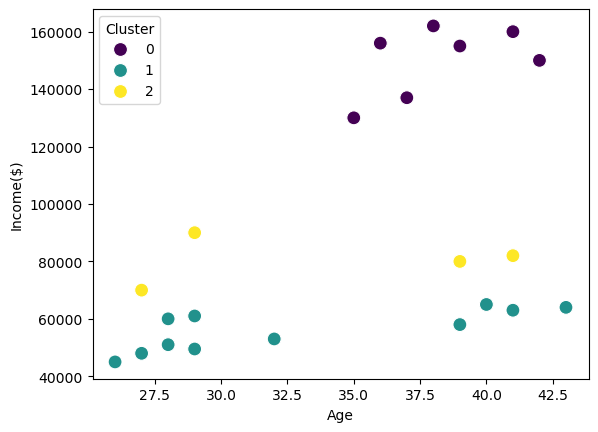

In [17]:
import seaborn as sns

sns.scatterplot(df, x="Age",y="Income($)",palette="viridis",s=100,hue="Cluster")

clusters are not divided properly hence we scale the data

# Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=["Age","Income($)"])

df_scaled[["Age","Income($)"]] = scaler.fit_transform(df[["Age","Income($)"]])

df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [26]:
km = KMeans(n_clusters=3, n_init="auto")
km.fit(df_scaled[["Age","Income($)"]])
df_scaled["Cluster"]=km.labels_
df_scaled.head()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


<Axes: xlabel='Age', ylabel='Income($)'>

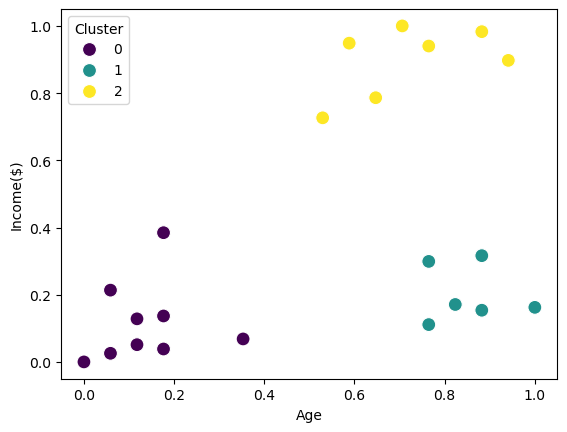

In [28]:
sns.scatterplot(df_scaled, x="Age",y="Income($)",palette="viridis",s=100,hue="Cluster")

In [30]:
# Centroids x,y coordinates
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [34]:
centroids = km.cluster_centers_

<Axes: xlabel='Age', ylabel='Income($)'>

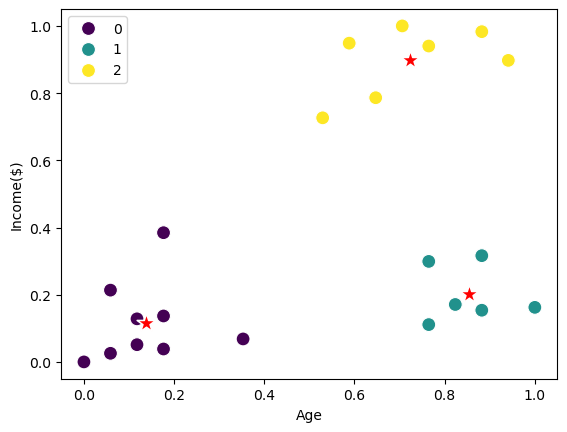

In [36]:
sns.scatterplot(df_scaled, x="Age",y="Income($)",palette="viridis",s=100,hue="Cluster")
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],s=200,color="red",marker="*")

In real life there would be many features and its difficult to visualize clusters , hence we follow elbow method for optimal k

# Capturing SSE

In [38]:
# SSE
km.inertia_

0.4750783498553096

In [40]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(df_scaled[["Age","Income($)"]])
    sse.append(km.inertia_)
sse

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.29418158015979134,
 0.23377969754548303,
 0.22399854735051267,
 0.1493720216511747,
 0.1372748288875223]

# Elbow plot

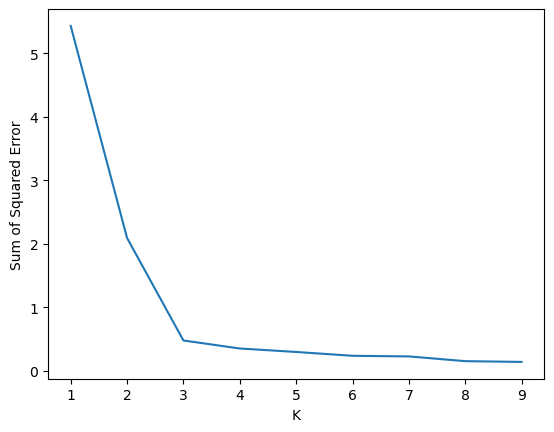

In [44]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)
plt.show()

In [ ]:
# here K = 3 is the optimal value